### Só para adicionar os dados

5


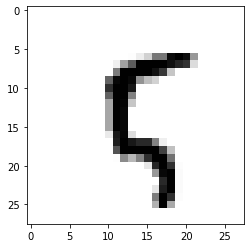

In [1]:
import numpy as np
import idx2numpy
import matplotlib.pyplot as plt

imagefile = 'mnist_database/train-images.idx3-ubyte'
imagearray = idx2numpy.convert_from_file(imagefile)
size = len(imagearray)

#print(imagearray[100])

# apenas um exemplo
plt.imshow(imagearray[100], cmap=plt.cm.binary)

labelfile = 'mnist_database/train-labels.idx1-ubyte'
labelarray = idx2numpy.convert_from_file(labelfile)

print(labelarray[100])

In [2]:
import math

# Distancia euclidiana
def euclidian(x, y):
    if x.size != y.size:
        return (-1)
    z = y - x
    distance = math.sqrt(sum(z**2))
    return distance

# Distance de Mahalanobis
def mahalanobis(x, y, eigenvalues, k):
    if len(x[0]) != len(y):
        return (-1) 
    N = len(x)
    distance =[]
    for i in range(N):
        distance.append(np.sum(np.divide((x[i]-y)**2, eigenvalues[:k]))) 
    return distance

In [3]:
# PCA
def pca(X, confidence=0.9):
    # Media
    mean = np.mean(X,0)
    
    # Centralizar os dados
    phi = X - mean
    
    # Calcular os vetores e valores proprios atraves do SVD
    eigenvectors, sigma, variance = np.linalg.svd(phi.transpose(), full_matrices=False)
    eigenvalues = sigma*sigma
    
    # Ordenar valores próprios por ordem Decrescente
    idx = np.argsort(-eigenvalues)
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:,idx]
    
    # Determinar o nº de vetores próprios a usar
    k = 0
    traco = np.sum(eigenvalues)
    while(np.sum(eigenvalues[:k])/traco < confidence):
        k = k+1
    print("Número de vetores próprios a usar: " + str(k))
    
    # Escolher os vetores próprios associados
    eigenvectors = eigenvectors[:,0:k]
    return k, eigenvalues, eigenvectors, phi, mean, variance

# Calculo dos coeficientes da projecao
def coefProj(phi, eigenvectors, size):
    coef_proj = [np.dot(phi[i], eigenvectors) for i in range(size)]
    return coef_proj

# Obter os vetores próprios de acordo com um certo nivel de confianca
k, eigenvalues, eigenvectors, phi, mean, variance = pca(imagearray, 0.9)
eigenvalues

Número de vetores próprios a usar: 26


array([[[1.21761918e+05, 5.88017079e+04, 4.18141812e+04, ...,
         9.55016459e-28, 9.55016459e-28, 1.55178476e-36],
        [2.05605948e+06, 9.40400612e+05, 5.27232868e+05, ...,
         1.93612662e-26, 1.93612662e-26, 8.93872540e-34],
        [1.31342976e+07, 7.48261636e+06, 5.88466856e+06, ...,
         1.12181043e-25, 1.12181043e-25, 3.40713122e-32],
        ...,
        [5.38161475e+07, 3.63166057e+07, 2.88100226e+07, ...,
         4.63033556e-25, 4.63033556e-25, 1.24947970e-30],
        [8.54389793e+06, 4.81901580e+06, 3.74071401e+06, ...,
         7.37108266e-26, 7.37108266e-26, 1.09777803e-32],
        [4.30571341e+05, 3.29559727e+05, 2.28888453e+05, ...,
         3.63791632e-27, 3.63791632e-27, 3.82514243e-34]],

       [[1.21761918e+05, 5.88017079e+04, 4.18141812e+04, ...,
         9.55016459e-28, 9.55016459e-28, 1.55178476e-36],
        [2.05605948e+06, 9.40400612e+05, 5.27232868e+05, ...,
         1.93612662e-26, 1.93612662e-26, 8.93872540e-34],
        [1.31342976e+07, 

In [8]:
# Obter os coeficientes das projecoes
coef_proj = coefProj(phi, eigenvectors, imagearray.shape[0])
coef_proj

KeyboardInterrupt: 

In [5]:
# Gráfico do cotovelo
#plt.figure(figsize=(10,10))
#t = np.arange(0, size, 1)
#plt.plot(t, eigenvalues, 'x')
#plt.plot(k, eigenvalues[k], 'o')
#plt.show()

In [6]:
# Verificar se identifica ou nao o input
def testar(input_img , mean, eigenvectors , eigenvalues , size , coef_proj , distance = "mahalanobis"):
    
    dist = []
    
    # Centrar o input
    test_phi = input_img - mean
    
    # Calcular os coeficientes da projeccao do input
    test_coef_proj = np.dot(test_phi , eigenvectors)
    
    if distance == "euclidian":
        #dist = [np.linalg.norm( coef_proj[i] - test_coef_proj ) for i in range (size)]
        dist = [euclidian(coef_proj[i], test_coef_proj) for i in range (size)]
        d_min = round(np.min(dist),2)
        d_max = round(np.max(dist),2)
        limit = 14500
    elif distance == "mahalanobis" :
        dist = mahalanobis(coef_proj , test_coef_proj , eigenvalues , eigenvectors.shape [1])
        d_min = round(np.min(dist),4)
        d_max = round(np.max(dist),4)
        limit = 0.09
    else: 
        print("Distância invalida.")
        return (-1)
    
    print('Distância minima: '+ str(d_min))

    if d_min < limit:
        print('Imagem nr.: '+str(np.argmin(dist)))
        return dist, test_coef_proj
    else: 
        print('Falhou no reconhecimento.')
        return [],[]

In [7]:
# Teste
dist, test_coef_proj = testar(imagearray[100], mean, eigenvectors, eigenvalues, imagearray[0].shape[0], coef_proj, 'mahalanobis')
lista[np.argmin(dist)]

ValueError: operands could not be broadcast together with shapes (28,28,26,28) (26,28,28) 